# Data Visualization Demo 
# Using Nightingale Rose Data
## IE 2250/L – Placencia
## Objective:
## Students who successfully finish this notebook should be able to:
    -  Read a csv file into a dataframe
    -  Print information about data in a dataframe
    -  Clean dirty data from a source file
    -  Visualize data
    -  Conduct a t-test in Python

In [9]:
import pandas as pd
import plotly.graph_objects as go
from math import pi

# Sample data (approximated, replace with actual data if available)
data = {
    'Month': ['Apr 1854', 'May 1854', 'Jun 1854', 'Jul 1854', 'Aug 1854', 'Sep 1854',
              'Oct 1854', 'Nov 1854', 'Dec 1854', 'Jan 1855', 'Feb 1855', 'Mar 1855',
              'Apr 1855', 'May 1855', 'Jun 1855', 'Jul 1855', 'Aug 1855', 'Sep 1855',
              'Oct 1855', 'Nov 1855', 'Dec 1855', 'Jan 1856', 'Feb 1856', 'Mar 1856'],
    'Diseases': [120, 150, 200, 250, 300, 350, 400, 450, 500, 600, 550, 400,
                 50, 40, 35, 30, 25, 20, 15, 10, 10, 8, 7, 5],
    'Wounds': [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 50, 40,
               5, 3, 3, 2, 2, 1, 1, 1, 0, 0, 0, 0],
    'Other': [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 60, 50,
              10, 8, 7, 6, 5, 4, 3, 2, 2, 1, 1, 1],
    'Chart': ['1']*12 + ['2']*12  # Chart 1: 1854–55, Chart 2: 1855–56
}
df = pd.DataFrame(data)

In [11]:
print(df.describe)

<bound method NDFrame.describe of        Month  Diseases  Wounds  Other Chart
0   Apr 1854       120      10     20     1
1   May 1854       150      15     25     1
2   Jun 1854       200      20     30     1
3   Jul 1854       250      25     35     1
4   Aug 1854       300      30     40     1
5   Sep 1854       350      35     45     1
6   Oct 1854       400      40     50     1
7   Nov 1854       450      45     55     1
8   Dec 1854       500      50     60     1
9   Jan 1855       600      55     65     1
10  Feb 1855       550      50     60     1
11  Mar 1855       400      40     50     1
12  Apr 1855        50       5     10     2
13  May 1855        40       3      8     2
14  Jun 1855        35       3      7     2
15  Jul 1855        30       2      6     2
16  Aug 1855        25       2      5     2
17  Sep 1855        20       1      4     2
18  Oct 1855        15       1      3     2
19  Nov 1855        10       1      2     2
20  Dec 1855        10       0      2     

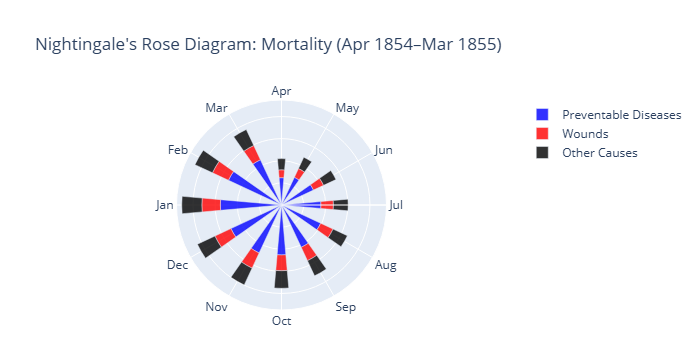

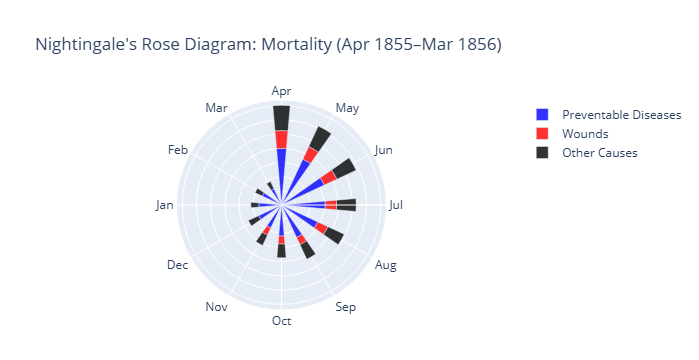

In [19]:
# Calculate radius for area-proportional wedges (area = pi * r^2, so r = sqrt(area/pi))
df['Diseases_Radius'] = (df['Diseases'] / pi) ** 0.5
df['Wounds_Radius'] = (df['Wounds'] / pi) ** 0.5
df['Other_Radius'] = (df['Other'] / pi) ** 0.5

# Function to create a Nightingale Rose Diagram for a given chart period
def create_rose_diagram(chart_number, title):
    # Filter data for the chart period
    df_chart = df[df['Chart'] == chart_number]
    
    # Create figure
    fig = go.Figure()
    
    # Add traces for each cause of death
    for cause, color, name in [
        ('Diseases_Radius', 'blue', 'Preventable Diseases'),
        ('Wounds_Radius', 'red', 'Wounds'),
        ('Other_Radius', 'black', 'Other Causes')
    ]:
        fig.add_trace(go.Barpolar(
            r=df_chart[cause],
            theta=[i * 30 for i in range(12)],  # 360/12 = 30 degrees per month
            width=10,  # Wedge width in degrees
            name=name,
            marker_color=color,
            opacity=0.8
        ))
    
    # Update layout
    fig.update_layout(
        title=title,
        polar=dict(
            radialaxis=dict(visible=True, showticklabels=False, ticks=''),
            angularaxis=dict(
                direction='clockwise',
                period=12,
                tickvals=[i * 30 for i in range(12)],
                ticktext=df_chart['Month'].str[:3]  # Show abbreviated month names
            )
        ),
        showlegend=True,
        margin=dict(l=50, r=50, t=100, b=50)
    )
    
    return fig

# Create and save diagrams for both periods
fig1 = create_rose_diagram('1', "Nightingale's Rose Diagram: Mortality (Apr 1854–Mar 1855)")
fig2 = create_rose_diagram('2', "Nightingale's Rose Diagram: Mortality (Apr 1855–Mar 1856)")

# Save as HTML for interactive output (or use fig.show() for local display)
fig1.write_html("nightingale_rose_1854_1855.html")
fig2.write_html("nightingale_rose_1855_1856.html")

# Optional: Display in Jupyter or local environment
fig1.show()
fig2.show()